<a href="https://colab.research.google.com/github/JairsonAlbertoSami/desafio-junior-data-scientis/blob/main/visualizacao_Analise_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Técnico - Cientista de Dados Júnior - Rio de Janeiro

Este código foi desenvolvido como parte do desafio técnico para a posição de **Cientista de Dados Júnior** no **Rio de Janeiro**. O objetivo deste desafio é demonstrar habilidades em visualização de dados.


In [51]:
!pip install requests

In [52]:
# importar bibliotecas necessárias
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
import datetime
import json

# 2. **Qual mês de 2024 tem o maior número de feriados?**

In [53]:
response = requests.get('https://date.nager.at/api/v3/PublicHolidays/2024/BR')
if response.status_code == 200:
    holidays = response.json()
    print(f"Número total de feriados no Brasil em 2024: {len(holidays)}")
    print(" ")
    for holiday in holidays:
        print(f"{holiday['date']}: {holiday['localName']}")

Número total de feriados no Brasil em 2024: 14
 
2024-01-01: Confraternização Universal
2024-02-12: Carnaval
2024-02-13: Carnaval
2024-03-29: Sexta-feira Santa
2024-03-31: Domingo de Páscoa
2024-04-21: Dia de Tiradentes
2024-05-01: Dia do Trabalhador
2024-05-30: Corpus Christi
2024-07-09: Revolução Constitucionalista de 1932
2024-09-07: Dia da Independência
2024-10-12: Nossa Senhora Aparecida
2024-11-02: Dia de Finados
2024-11-15: Proclamação da República
2024-12-25: Natal


In [54]:
holidays_by_month = {}
for holiday in holidays:
    month = datetime.datetime.strptime(holiday['date'], '%Y-%m-%d').strftime('%B')
    if month not in holidays_by_month:
        holidays_by_month[month] = 0
    holidays_by_month[month] += 1

In [55]:
fig = go.Figure(data=[go.Bar(x=list(holidays_by_month.keys()), y=list(holidays_by_month.values()))])
fig.update_layout(title='Número de Feriados por Mês em 2024 no Brasil',
                  xaxis_title='Mês',
                  yaxis_title='Número de Feriados')

fig.update_layout(
    title_x=0.5,
    width=1000,
    height=600,
    xaxis_tickangle=-45)

fig.show()

# 3. **Quantos feriados em 2024 caem em dias de semana (segunda a sexta-feira)?**

In [56]:
weekday_holidays = 0
for holiday in holidays:
    date = datetime.datetime.strptime(holiday['date'], '%Y-%m-%d')
    if date.weekday() < 5:
        weekday_holidays += 1

labels = ['Feriados em Dias de Semana', 'Feriados em Fins de Semana']
values = [weekday_holidays, len(holidays) - weekday_holidays]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Distribuição de Feriados em 2024 (Dias de Semana vs. Fins de Semana)')

fig.update_layout(
    title_x=0.5,
    xaxis_tickangle=-45
)
fig.show()

# 4. **Qual foi a temperatura média em cada mês?**
Utilize a Open-Meteo Historical Weather API para obter as temperaturas médias diárias no Rio de Janeiro de 01/01/2024 a 01/08/2024

- [Open-Meteo Historical Weather API](https://open-meteo.com/)

In [57]:
start_date = '2024-01-01'
end_date = '2024-08-01'
latitude, longitude = -22.9068, -43.1729
url = (f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}'
      f'&longitude={longitude}&start_date={start_date}&end_date={end_date}'
      f'&daily=temperature_2m_mean&timezone=America%2FSao_Paulo')

In [58]:
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    temperatures = data['daily']['temperature_2m_mean']
    dates = data['daily']['time']

    monthly_temperatures = {}
    for date, temp in zip(dates, temperatures):
        month = datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%B')
        monthly_temperatures.setdefault(month, []).append(temp)

    average_temperatures = {month: sum(temps) / len(temps) for month, temps in monthly_temperatures.items()}

    fig = go.Figure(data=[go.Scatter(x=list(average_temperatures.keys()),
                                     y=list(average_temperatures.values()),
                                     mode='lines+markers')])
    fig.update_layout(title='Temperatura Média Mensal no Rio de Janeiro (2024) em graus Celsius',
                      xaxis_title='Mês',
                      yaxis_title='Temperatura Média (°C)')

    fig.update_layout(
    title_x=0.5,
    xaxis_tickangle=-45
)
    fig.show()
else:
    print("Erro ao obter dados da API.")

5. # **Qual foi o tempo predominante em cada mês nesse período?**  
   Utilize como referência para o código de tempo (_weather_code_) o seguinte link: [WMO Code](https://gist.github.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c).


In [59]:
gist_url = 'https://gist.githubusercontent.com/stellasphere/9490c195ed2b53c707087c8c2db4ec0c/raw/'
response = requests.get(gist_url)
if response.status_code == 200:
    weather_data = json.loads(response.text)
else:
    print(f"Erro ao acessar o Gist: {response.status_code}")

In [60]:
url = (f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}'
        f'&longitude={longitude}&start_date={start_date}&end_date={end_date}'
        f'&daily=weathercode&timezone=America%2FSao_Paulo')

response = requests.get(url)

In [61]:
if response.status_code == 200:
    data = response.json()
    weather_codes = data['daily']['weathercode']
    dates = data['daily']['time']

    monthly_weather_codes = {}

    for date, code in zip(dates, weather_codes):
        month = date[5:7]
        monthly_weather_codes.setdefault(month, []).append(code)

    months = list(monthly_weather_codes.keys())
    descriptions = []

    for codes in monthly_weather_codes.values():
        predominant_code = max(set(codes), key=codes.count)
        description = weather_data.get(str(predominant_code), {'day': {'description': 'Código desconhecido'}})['day']['description']
        descriptions.append(description)



    fig = go.Figure(data=[go.Pie(labels=months, values=[1] * len(months),
                                 text=descriptions, textinfo='label+text', textposition='auto')])

    fig.update_layout(
        title='Tempo Predominante em cada Mês no Rio de Janeiro (2024)',
        title_x=0.5,
        width=1000,
        height=600
    )

    fig.show()
else:
    print(f"Erro ao acessar a API: {response.status_code}")


# 6. **Qual foi o tempo e a temperatura média em cada feriado de 01/01/2024 a 01/08/2024?**


In [62]:
url_weather = (f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}'
              f'&longitude={longitude}&start_date={start_date}&end_date={end_date}'
              f'&daily=temperature_2m_mean,weathercode&timezone=America%2FSao_Paulo')

response_weather = requests.get(url_weather)

if response_weather.status_code == 200:
    data_weather = response_weather.json()
    temperatures = data_weather['daily']['temperature_2m_mean']
    weather_codes = data_weather['daily']['weathercode']
    dates = data_weather['daily']['time']
else:
    print(f"Erro ao acessar a API de clima: {response_weather.status_code}")
    temperatures = []
    weather_codes = []
    dates = []

url_holidays = 'https://date.nager.at/api/v3/PublicHolidays/2024/BR'
response_holidays = requests.get(url_holidays)

if response_holidays.status_code == 200:
    holidays = response_holidays.json()
else:
    print(f"Erro ao acessar a API de feriados: {response_holidays.status_code}")
    holidays = []

In [63]:
holiday_dates = []
holiday_names = []
holiday_temperatures = []
holiday_weather_descriptions = []

for holiday in holidays:
    holiday_date = holiday['date']
    if holiday_date in dates:
        index = dates.index(holiday_date)
        temperature = temperatures[index]
        weather_code = weather_codes[index]

        if str(weather_code) in weather_data:
            weather_description = weather_data[str(weather_code)]['day']['description']
        else:
            weather_description = "Código desconhecido"

        holiday_dates.append(holiday_date)
        holiday_names.append(holiday['localName'])
        holiday_temperatures.append(temperature)
        holiday_weather_descriptions.append(weather_description)

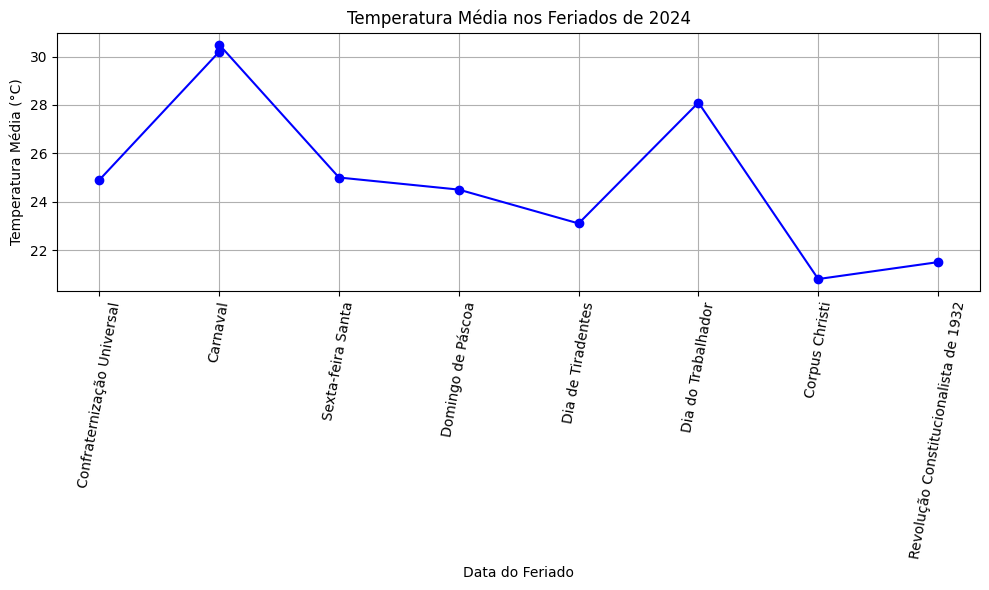

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(holiday_names, holiday_temperatures, marker='o', linestyle='-', color='blue')
plt.xlabel('Data do Feriado')
plt.ylabel('Temperatura Média (°C)')
plt.title('Temperatura Média nos Feriados de 2024')
plt.xticks(rotation=80)
plt.grid(True)

plt.tight_layout()
plt.show()